###  Import the required libraries and load the data

In [1]:
# 1) import the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("renttherunway.csv")
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
# 2) shape and info of the data
df.shape

(192544, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

### Data cleansing and Exploratory data analysis

In [5]:
# 3) check for duplicates
df.duplicated().sum()

0

no duplicates in the data

In [6]:
# 4) drop redundant columns

drop unnamed:0 and used id columns and review 

In [7]:
df.drop(["Unnamed: 0","user_id","review_text","review_summary","review_date","item_id"],axis=1,inplace=True)

In [8]:
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [9]:
# 5) remove lbs from weight

In [10]:
df["weight"]=df["weight"].str.replace('\D', '', regex=True).astype(float)

In [11]:
df["weight"]

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

In [12]:
#6) Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'

In [13]:
df["rented for"].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [14]:
df["rented for"].replace({"party: cocktail":"party"},inplace=True)

In [15]:
df["rented for"].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [16]:
#7) The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [17]:
df["firstpart"]=df["height"].str.split("'").str[0].astype(float)
df["secondpart"]=df["height"].str.split("'").str[1]

In [18]:
df["secondpart"]=df["secondpart"].str.replace('\D', '', regex=True).astype(float)

In [19]:
df["height"]=df["firstpart"]*12+df["secondpart"]

In [20]:
df.drop(["firstpart","secondpart"],axis=1,inplace=True)

In [21]:
df["height"]

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

In [22]:
#8) Check for missing values in each column of the dataset? If it exists, imputethem with appropriate methods

In [23]:
df.isna().sum()/len(df)*100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

missing values are present in bust size, weight , rating , rented for, body type , height and age
percentage of missing values for Rating and Rented for is very loss so we can drop the rows

In [24]:
# impute missing values

In [25]:
df["weight"]=df["weight"].fillna(df["weight"].mean())
df["height"]=df["height"].fillna(df["height"].mean())
df["age"]=df["age"].fillna(df["age"].mean())
df["rating"]=df["rating"].fillna(df["rating"].mean())

In [26]:
df["bust size"]=df["bust size"].fillna(df["bust size"].mode().iloc[0])
df["rented for"]=df["rented for"].fillna(df["rented for"].mode().iloc[0])
df["body type"]=df["body type"].fillna(df["body type"].mode().iloc[0])

In [27]:
df.isna().sum()/len(df)*100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

In [28]:
dfc=df.copy()

In [29]:
#9) Check the statistical summary for the numerical and categorical columns and write your findings

In [30]:
# statistical summary for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192544.0,137.391709,20.122771,50.0,125.0,137.391709,145.0,300.0
rating,192544.0,9.092371,1.429740,2.0,8.0,10.000000,10.0,10.0
height,192544.0,65.310621,2.658793,54.0,63.0,65.000000,67.0,78.0
size,192544.0,12.245175,8.494877,0.0,8.0,12.000000,16.0,58.0
age,192544.0,33.871017,8.037969,0.0,29.0,32.000000,37.0,117.0


mean and mode are almost close for all columns
max values of weight , size and age are very high so presence of outliers in these columns

In [31]:
df.describe(include="O").T

,count,unique,top,freq
fit,192544,3,fit,142058
bust size,192544,106,34b,45696
rented for,192544,8,wedding,57794
body type,192544,7,hourglass,69986
category,192544,68,dress,92884


around 50% of category is dress 
most of cloths fit the customers the data is biased towards fit 

In [32]:
#10) Are there outliers present in the column age? If yes, treat them with the appropriate method.

<Axes: >

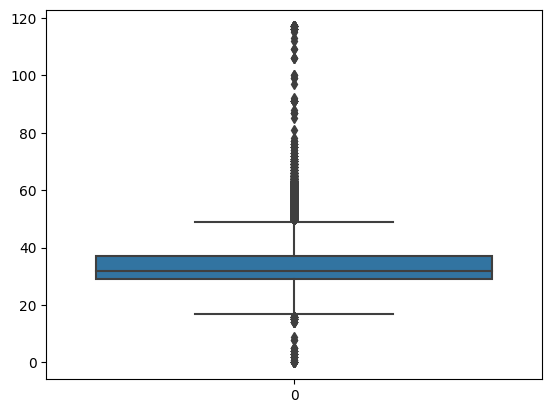

In [33]:
sns.boxplot(df["age"])

 outliers are present in the age column

In [34]:
Q1= df["age"].quantile(0.25)
Q3= df["age"].quantile(0.75)
IQR=Q3-Q1
lower_whisker= Q1-(1.5*IQR)
upper_whisker= Q3+(1.5*IQR)
df= df.loc[(df["age"] < upper_whisker) & (df["age"] > lower_whisker)]

<Axes: >

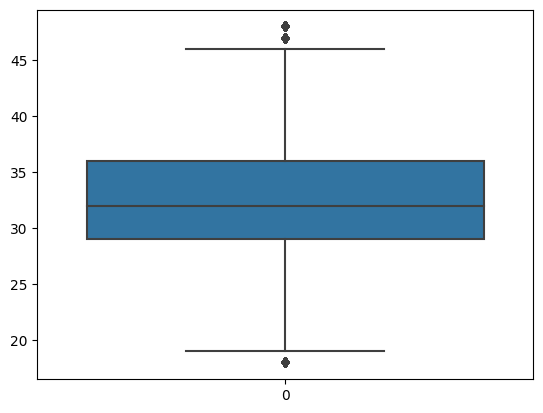

In [35]:
sns.boxplot(df["age"])


In [36]:
#11) Check the distribution of the different categories in the column 'rented for' using appropriate plot

<Axes: xlabel='rented for', ylabel='count'>

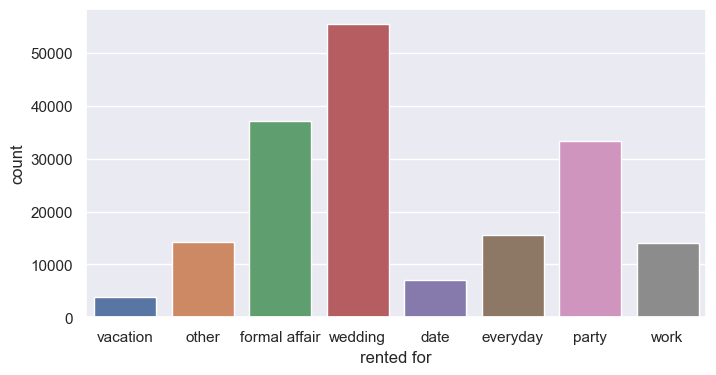

In [37]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.countplot(data=df,x="rented for")

<Axes: title={'center': 'Rented For'}, ylabel='count'>

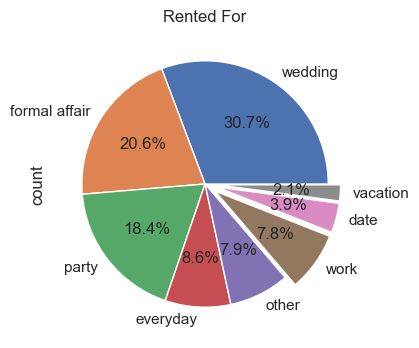

In [38]:
df["rented for"].value_counts().plot(kind="pie",title="Rented For",autopct="%1.1f%%",explode=(0,0,0,0,0,0.1,0.1,0.1))

# Data Preparation for model building

In [39]:
# 12) Encode the categorical variables in the dataset.

In [40]:
cat=["fit","bust size","rented for","body type","category"]
le=LabelEncoder()
for i in cat:
    df[i]=le.fit_transform(df[i])

In [41]:
df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0
5,0,24,138.0,8.0,0,1,16,68.0,8,45.0
...,...,...,...,...,...,...,...,...,...,...
192539,0,41,140.0,10.0,7,3,26,69.0,8,42.0
192540,0,25,100.0,10.0,7,5,16,61.0,4,29.0
192541,0,48,135.0,6.0,1,6,16,68.0,8,31.0
192542,0,51,165.0,10.0,6,4,16,66.0,16,31.0


In [42]:
# 13) Standardize the data, so that the values are within a particular range

In [43]:
ss = StandardScaler()
df1=df.copy()
scaled_features= ss.fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features,index=df1.index,columns=df1.columns)
scaled_features_df

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556736,0.019749,-0.013313,0.636420,0.502722,0.016734,1.578752,1.007849,0.233744,-0.771721
1,-0.556736,-0.164487,-0.263117,0.636420,-0.468186,1.926154,-0.304791,0.257659,-0.004575,0.583701
3,-0.556736,-0.072369,-0.113235,-0.765861,-0.953639,0.653207,-0.618715,-0.117436,-0.481212,0.244845
4,-0.556736,-0.164487,0.386374,0.636420,0.988176,-1.256213,-0.304791,1.382944,-0.004575,-0.941148
5,-0.556736,-1.362019,0.036648,-0.765861,-1.924547,-1.256213,-0.618715,1.007849,-0.481212,2.108549
...,...,...,...,...,...,...,...,...,...,...
192539,-0.556736,0.203985,0.136570,0.636420,1.473629,0.016734,0.166095,1.382944,-0.481212,1.600266
192540,-0.556736,-1.269901,-1.861866,0.636420,1.473629,1.289681,-0.618715,-1.617816,-0.957850,-0.602293
192541,-0.556736,0.848810,-0.113235,-2.168142,-1.439093,1.926154,-0.618715,1.007849,-0.481212,-0.263438
192542,-0.556736,1.125164,1.385592,0.636420,0.988176,0.653207,-0.618715,0.257659,0.472062,-0.263438


# Principal Component Analysis and Clustering

In [44]:
# 14) Apply PCA on the above dataset and determine the number of PCAcomponents to be used so that 90-95% of the variance 

In [45]:
# calculate the covariance matrix
cov_matrix=np.cov(scaled_features_df.T)
cov_matrix

array([[ 1.00000553e+00,  8.81603765e-03,  1.44408795e-02,
        -2.44067705e-01,  7.47746521e-03, -8.24831996e-03,
         4.95014247e-04, -2.66025206e-05,  6.57965058e-02,
        -1.84758952e-03],
       [ 8.81603765e-03,  1.00000553e+00,  5.73972098e-01,
        -2.09505823e-02,  4.59521046e-04, -2.17210131e-01,
        -1.29251120e-02,  1.48417703e-01,  6.26673373e-01,
         1.47459537e-01],
       [ 1.44408795e-02,  5.73972098e-01,  1.00000553e+00,
        -2.12351211e-02,  1.00146149e-02, -2.38748626e-01,
        -1.79957682e-02,  3.53456589e-01,  7.31743686e-01,
         6.76896119e-02],
       [-2.44067705e-01, -2.09505823e-02, -2.12351211e-02,
         1.00000553e+00,  1.26472103e-02,  5.22976740e-03,
        -2.40458808e-02,  1.20515857e-03, -3.78407843e-02,
        -5.02920316e-02],
       [ 7.47746521e-03,  4.59521046e-04,  1.00146149e-02,
         1.26472103e-02,  1.00000553e+00, -1.12609444e-02,
        -5.88133470e-02, -1.73285930e-02,  6.53692565e-03,
        -1.

In [46]:
# eigen values and eigen vectors
eig_vals,eig_vectors= np.linalg.eig(cov_matrix)
print("eigen values = ",eig_vals)
print("\n")
print("eigen vectors = ",eig_vectors)


eigen values =  [2.55831584 0.25060006 0.41595085 1.24945191 0.74918027 1.07099118
 1.01739534 0.85321943 0.89126904 0.94368143]


eigen vectors =  [[-0.03800629 -0.05078519  0.03835114 -0.68347992 -0.68371826  0.1828109
   0.12958775  0.0961624  -0.01746437 -0.01118457]
 [-0.49487525 -0.09690517  0.78844787  0.02002165  0.05162451 -0.04445058
  -0.17392661  0.22961978 -0.18767766 -0.02859028]
 [-0.54623603 -0.67936165 -0.4470079   0.05121372  0.03578313  0.04418369
   0.08360516 -0.00623217 -0.16490372 -0.01416026]
 [ 0.03773305 -0.00575558 -0.0012783   0.70125878 -0.69991585 -0.03003036
  -0.02783014  0.10618992 -0.05973317  0.01935687]
 [-0.00359493  0.00412565  0.01586228  0.0437974   0.02650294  0.63327141
  -0.34008761 -0.18919126 -0.08116129  0.66183463]
 [ 0.25624745 -0.0210398   0.02598543 -0.04487492 -0.01154354 -0.0206501
  -0.08825489 -0.34680799 -0.86671554 -0.22668339]
 [ 0.01186052 -0.00740699  0.00436064 -0.0959367  -0.04103514 -0.63936985
   0.21384309  0.00178454 -0.1

In [47]:
total = sum(eig_vals) 
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("explained variance = ",var_exp)
print("cummulative variance explained = ",cum_var_exp)

explained variance =  [25.583016782348032, 12.494449989545394, 10.709852524991408, 10.17389705953965, 9.436762053473023, 8.912641101152422, 8.532147125831804, 7.491761214898197, 4.159485458653276, 2.505986689566791]
cummulative variance explained =  [ 25.58301678  38.07746677  48.7873193   58.96121636  68.39797841
  77.31061951  85.84276664  93.33452785  97.49401331 100.        ]


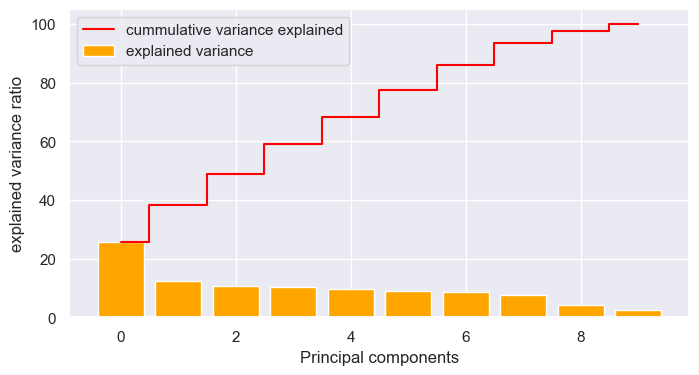

In [48]:
#plot
plt.bar(range(10),var_exp,align="center",color="orange",label="explained variance")
plt.step(range(10),cum_var_exp,where="mid",color="red",label="cummulative variance explained")
plt.xlabel("Principal components")
plt.ylabel("explained variance ratio")
plt.legend(loc="best")

the first 8 principal components capture 90-95% of variance

In [49]:
pca= PCA(n_components=8)

pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8"])
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.244445,-0.885110,0.441349,1.118713,1.502751,0.446820,-0.470908,-0.056095
1,-0.621129,-0.685022,0.469473,-0.452453,-0.990215,1.337351,-1.052463,-0.225774
2,-0.517549,0.208903,0.405634,-0.121114,-1.229185,0.139385,-0.272770,0.873547
3,0.673920,-1.222236,-1.215607,1.052382,0.790940,-1.005353,-0.404378,0.059598
4,-0.047435,0.306032,1.541570,-0.171644,-1.586642,-2.474585,-1.387730,0.400528


# Apply K-means clustering and segment the data

In [50]:
errors=[]
cluster_range=range(2,15)
for i in cluster_range:
    clusters= KMeans(i,random_state=100)
    clusters.fit(pca_df)
    errors.append(clusters.inertia_)

errors

[1404886.0820665983,
 1275902.7140376975,
 1172799.3738695602,
 1084094.6522138272,
 1028582.7816551254,
 977023.3946188255,
 934666.7576249505,
 904031.7515879378,
 876377.3490234375,
 853156.5381621107,
 830567.0508890132,
 810003.762481552,
 795312.8014877987]

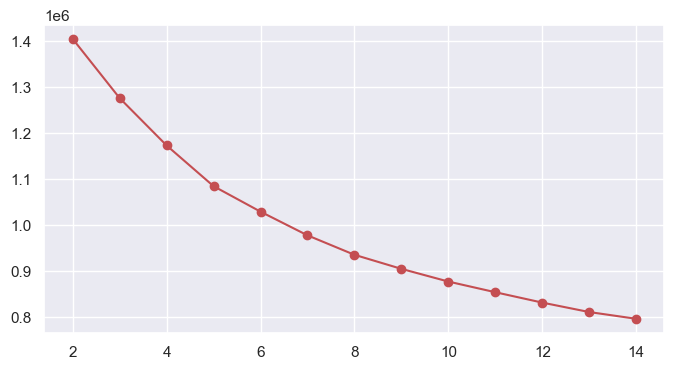

In [51]:
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':errors})


plt.plot(cluster_df["num_clusters"],cluster_df["cluster_errors"],marker="o",color="r")

from elbow plot we can see at the cluste k = 5

In [52]:
kmeans=KMeans(n_clusters=5,random_state=100) 
kmeans.fit(pca_df)

KMeans(n_clusters=5, random_state=100)

In [53]:
label=pd.DataFrame(kmeans.labels_,columns=["label"])

In [54]:
kmeans_df=pca_df.join(label)
kmeans_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,label
0,0.244445,-0.885110,0.441349,1.118713,1.502751,0.446820,-0.470908,-0.056095,4
1,-0.621129,-0.685022,0.469473,-0.452453,-0.990215,1.337351,-1.052463,-0.225774,0
2,-0.517549,0.208903,0.405634,-0.121114,-1.229185,0.139385,-0.272770,0.873547,3
3,0.673920,-1.222236,-1.215607,1.052382,0.790940,-1.005353,-0.404378,0.059598,3
4,-0.047435,0.306032,1.541570,-0.171644,-1.586642,-2.474585,-1.387730,0.400528,3


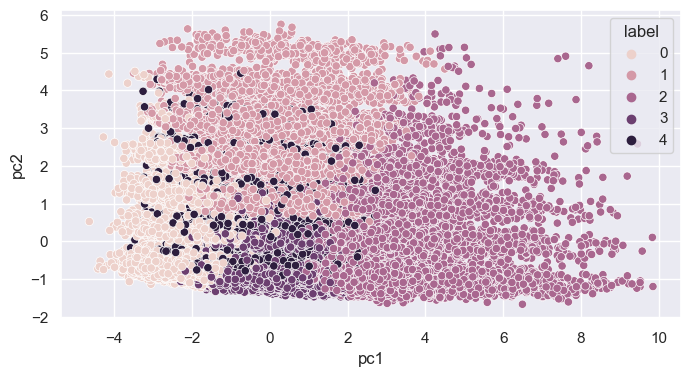

In [55]:
sns.scatterplot(x=kmeans_df["pc1"],y=kmeans_df["pc2"],hue="label",data=kmeans_df)
plt.show()

In [ ]:
#Finding silhouette_score

In [56]:
from sklearn.metrics import silhouette_score

In [58]:
sample_size1=10000
np.random.seed(0)
sampled_data1=pca_df.sample(n=sample_size1,replace=False)
for i in range(2,15):
    kcal=KMeans(n_clusters=i,random_state=100)
    kcal=kcal.fit(sampled_data1)
    labels=kcal.fit_predict(sampled_data1)
    print(i,silhouette_score(sampled_data1,labels))

2 0.1597254144253349
3 0.1617702754345866
4 0.12751237684555874
5 0.1344076473988127
6 0.121077176019124
7 0.12734339472892064
8 0.12709700387283748
9 0.11749590916805765
10 0.120178282314398
11 0.11904640792670845
12 0.11628106254331333
13 0.12239585585197256
14 0.11353326587712859


In [59]:
#from silhouette_score we can see the optimal cluster is 3

# Apply Agglomerative clustering and segment the data.

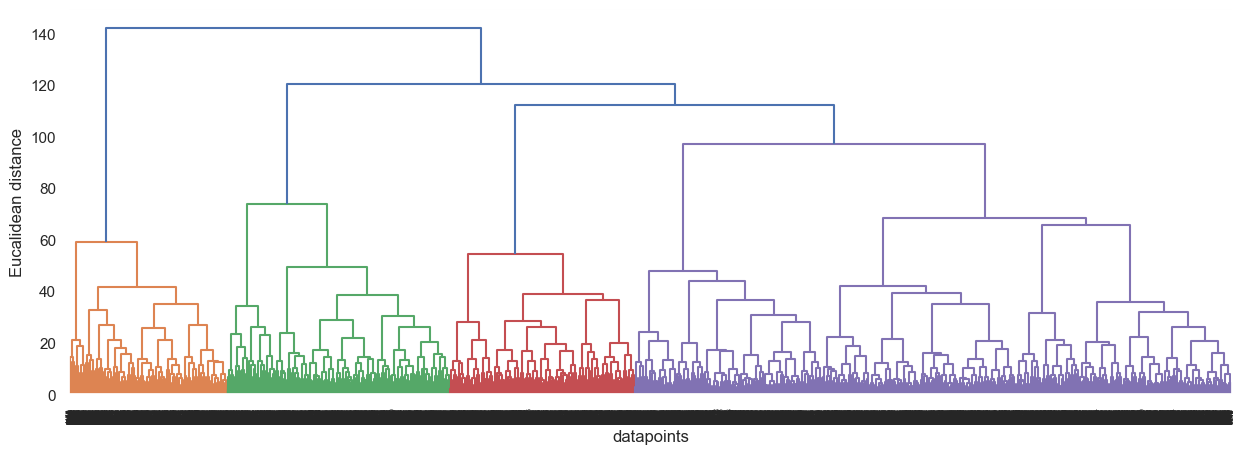

In [60]:
sample_size=10000
np.random.seed(0)
sampled_data=scaled_features_df.sample(n=sample_size,replace=False)

plt.figure(figsize=[15,5])
merg = linkage(sampled_data,method="ward")
dendrogram(merg,leaf_rotation=90,)
plt.xlabel("datapoints")
plt.ylabel("Eucalidean distance")
plt.show()

we select k = 4 from the dendrogram

In [62]:
hi_cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
hi_cluster_model=hi_cluster.fit(sampled_data)

In [63]:
df_label1=pd.DataFrame(hi_cluster_model.labels_,columns=["labels"])
df_label1.head()

,labels
0,2
1,2
2,0
3,0
4,0


In [65]:
for i in range(2,15):
    hi_si=AgglomerativeClustering(n_clusters=i)
    hi_si=hi_si.fit(sampled_data)
    labels=hi_si.fit_predict(sampled_data)
    print(i,silhouette_score(sampled_data,labels))

2 0.1643924357894863
3 0.12580981179983997
4 0.11791743168256208
5 0.08613430386330989
6 0.0946634001805655
7 0.06844426546172279
8 0.06158909980863689
9 0.06411364592261559
10 0.0671344067176171
11 0.07126580615361348
12 0.07001292238566609
13 0.06745555230638413
14 0.06065102203432689


In [ ]:
optimal cluster value is 2 from silhouette_score